# EDA

This notebook will focus on EDA of the Home Credit Default Risk, a Kaggle competition in which we have to predict whether a client is elegible to be given credit.

In [64]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [16]:
os.getcwd()

'/home/hugo/Documents/DataScience/Kaggle/kaggle_credit_risk/notebooks'

# Exploring some of the files given in the competition

First, let's explore the data a little bit. There are a few files which we have to explore in order to understand the data/problem.

In [23]:
DATA_PATH = '/home/hugo/Documents/DataScience/Kaggle/kaggle_credit_risk/data/*'

for filepath in glob.iglob(DATA_PATH):
    print(filepath.split('/')[-1])

bureau.csv
installments_payments.csv
previous_application.csv
POS_CASH_balance.csv
bureau_balance.csv
application_train.csv
sample_submission.csv
credit_card_balance.csv
application_test.csv
HomeCredit_columns_description.csv


Here, we can see that there are 10 datasets, containing informations about payments, applications, balances, and metadatas. We can leverage this to get domain knowledge about the problem and therefore create a good solution.

This notebook will focus on EDA (Exploratory Data Analysis), in which I'm going to explore all the datasets, treating missing data, treating categorical variables, and so on.

Let's start importing our first dataset to explore:

## Application_train.csv

In [24]:
application_train = pd.read_csv('../data/application_train.csv')

In [25]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


There are 65 float columns, 41 int columns, and 16 object columns. Depending on the ML algorithm used, we have to transform the object columns into dummies (for linear models), or only get categorical codes for them (for tree based models). 

In [28]:
print('application_train shape: ' + str(application_train.shape))
application_train.head()

application_train shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Here we can see that application_train has 307511 samples and 122 columns. Let's try to analyse it.

Let's figure out how many nulls there is.

In [30]:
list(application_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [29]:
application_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

Hum, there are a lot of columns with a large number of missing data. Let's create a function that drops columns with some percentage of missing values.

In [55]:
def drop_missings_columns(df, treshold = 0.9):
    '''
    Function that calculates all columns that have missing data above a certain treshold
    Parameters:
    -----------
    Inputs:
        df(Pandas Dataframe): Dataframe to compute the columns to drop
        thresold(float): limiar to calculate
    Returns:
        drop_columns (list): list with columns to drop
        df_no_missings (pandas dataframe): Dataframe without dropped columns
    '''
    
    total_samples = df.shape[0]
    
    missings_per_column = df.isnull().sum()
    
    percentages_per_column = missings_per_column / total_samples
    drop_columns = list(percentages_per_column[percentages_per_column > treshold].index)
    
    return df.drop(drop_columns, axis=1), drop_columns
    
    

In [61]:
application_train_no_missing, drop_columns = drop_missings_columns(application_train, treshold = 0.8)

Right, so now let's treat all the missing data left. Before taking care of them, I'll plot some distributions in order to understand better the data.

I'm going to separate the data by datatypes, leaving numerical data in one dataframe, and categorical columns in other dataframe.

In [68]:
# Separating datatypes

at_object = application_train_no_missing.select_dtypes(include='object')
at_numerical = application_train_no_missing.select_dtypes(exclude='object')

print('Object df shape: ' + str(at_object.shape))
print('Numerical df shape: ' + str(at_numerical.shape))

Object df shape: (307511, 16)
Numerical df shape: (307511, 106)


Let's first analyze the numerical dataframe

In [71]:
at_numerical.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


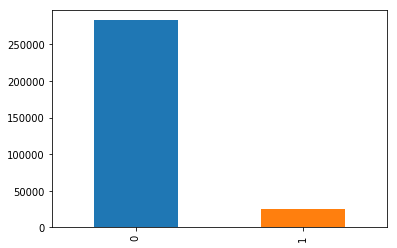

In [80]:
at_numerical.TARGET.value_counts().plot(kind='bar')
plt.show()

We can see that this is an imbalanced learning problem. There are 10 times more 0's than 1's, so I have to adopt some strategy of sampling or something similar.

Let's plot some other variables.

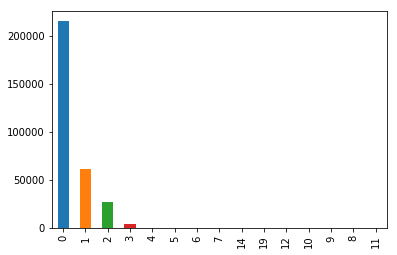

In [81]:
at_numerical.CNT_CHILDREN.value_counts().plot(kind='bar')
plt.show()